## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в банку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

### Імпорт бібліотек, даних і огляд датасету

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from IPython.display import display, HTML
import shap

In [130]:
pd.set_option('display.max_columns', None)
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mid-term project/bank-additional-full.csv', sep=";")
raw_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [131]:
raw_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [132]:
raw_df['y'].unique()

array(['no', 'yes'], dtype=object)

In [133]:
numeric_cols = raw_df.select_dtypes(include=['int64', 'float64'])
categorical_cols = raw_df.select_dtypes(include=['object'])

numeric_cols.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [134]:
categorical_cols.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Аналіз категорійних змінних

Для кожної категорійної змінної побудуємо графік, на якому виведемо всі категорії, частку клієнтів, які відкрили депозит, і загальну кількість клієнтів у цій категорії

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


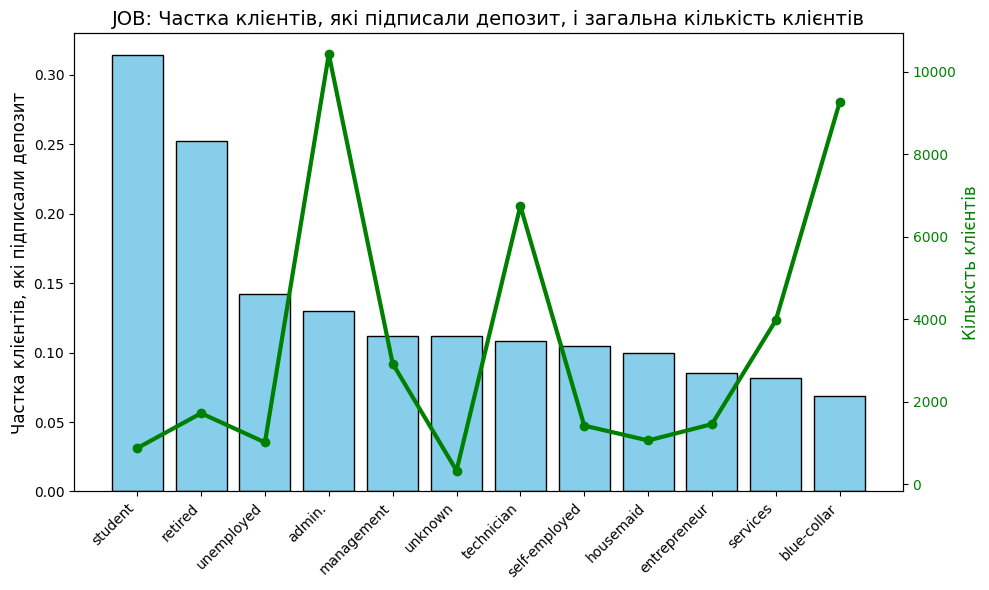

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


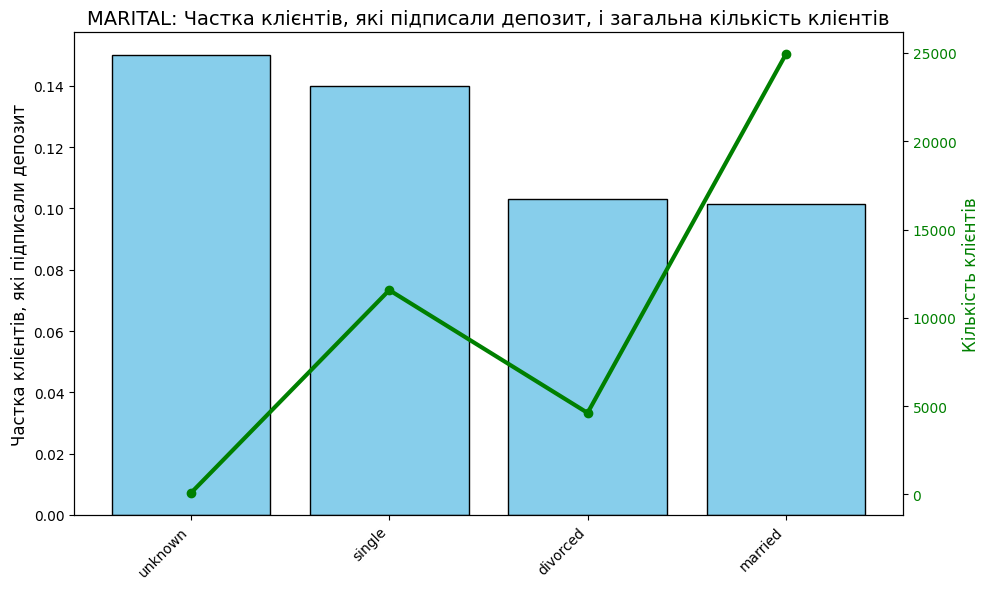

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


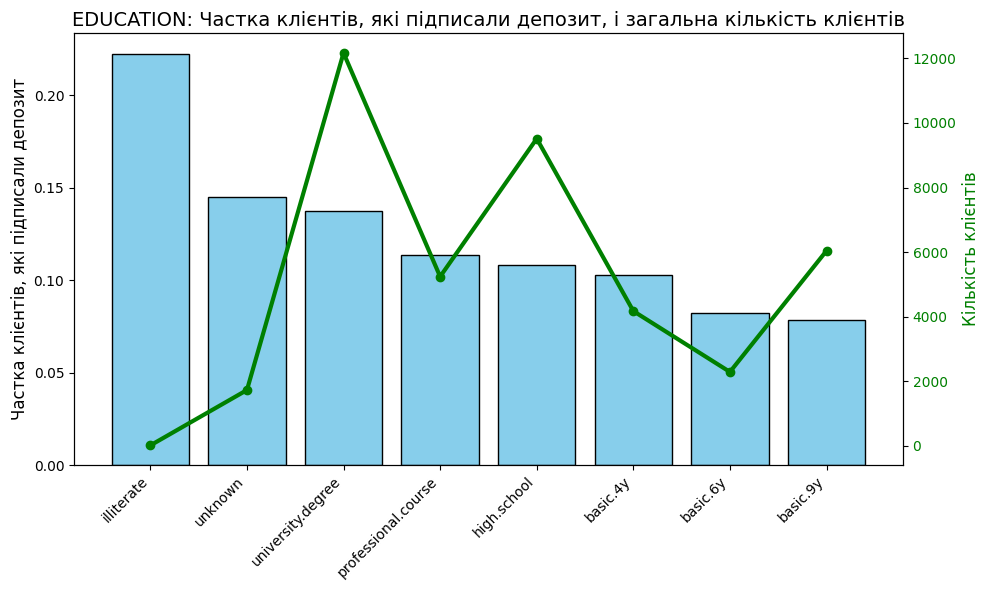

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


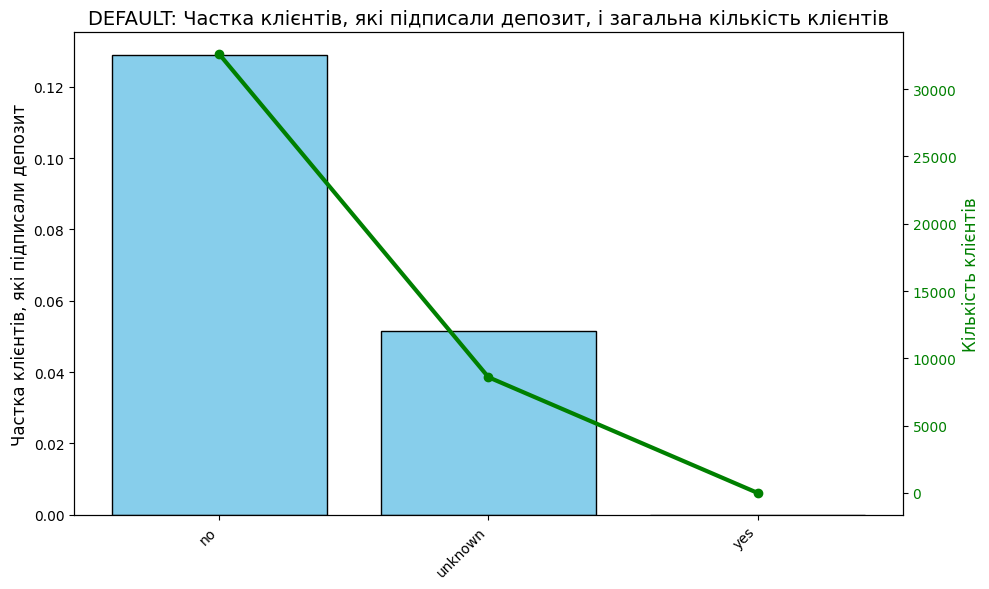

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


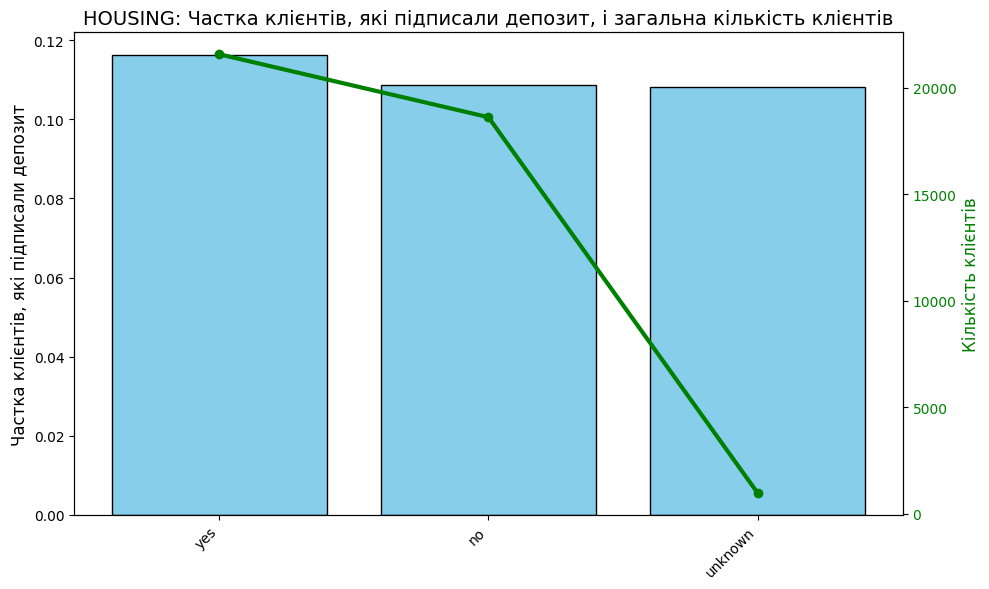

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


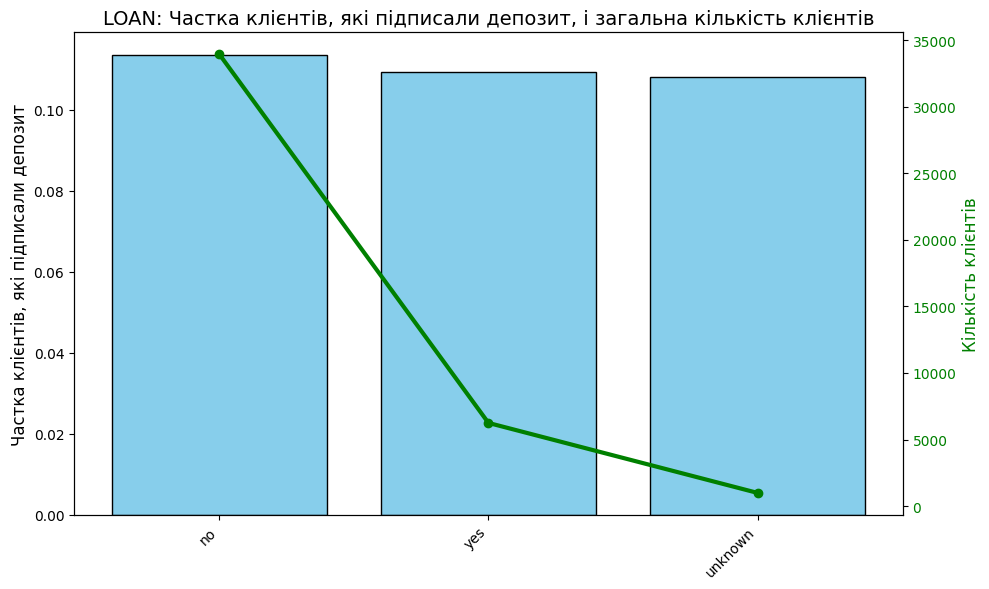

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


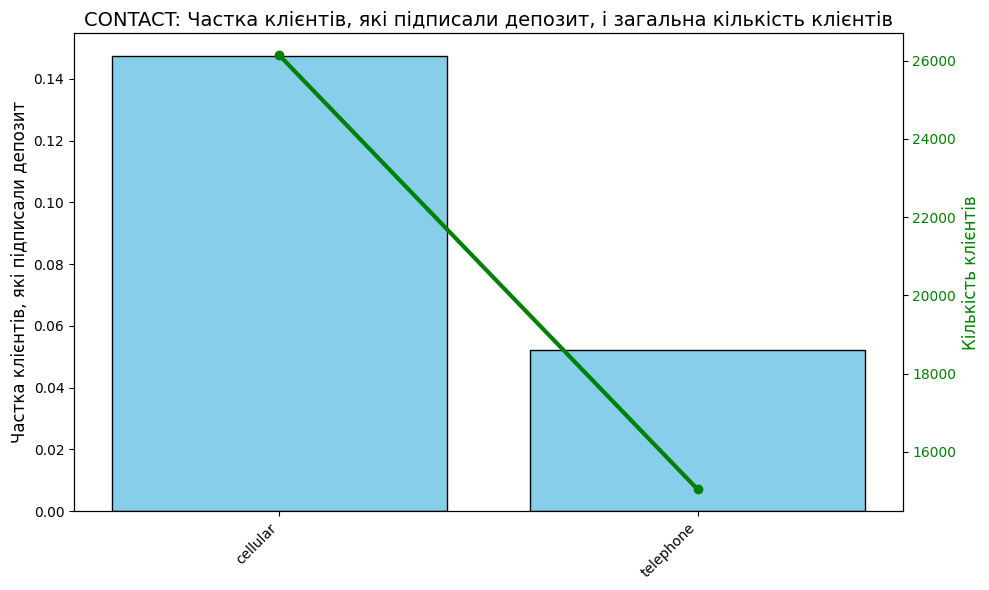

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


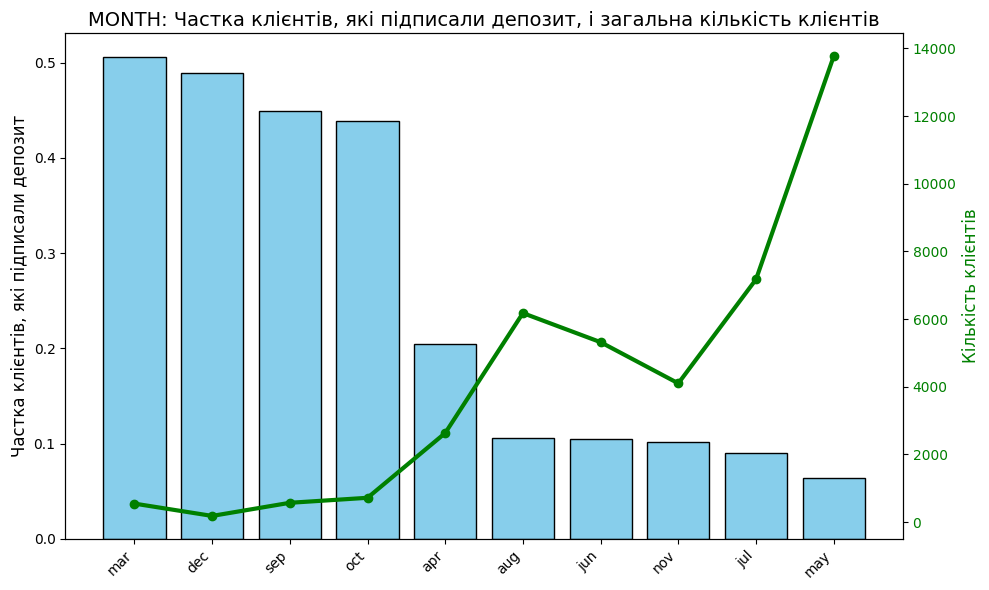

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


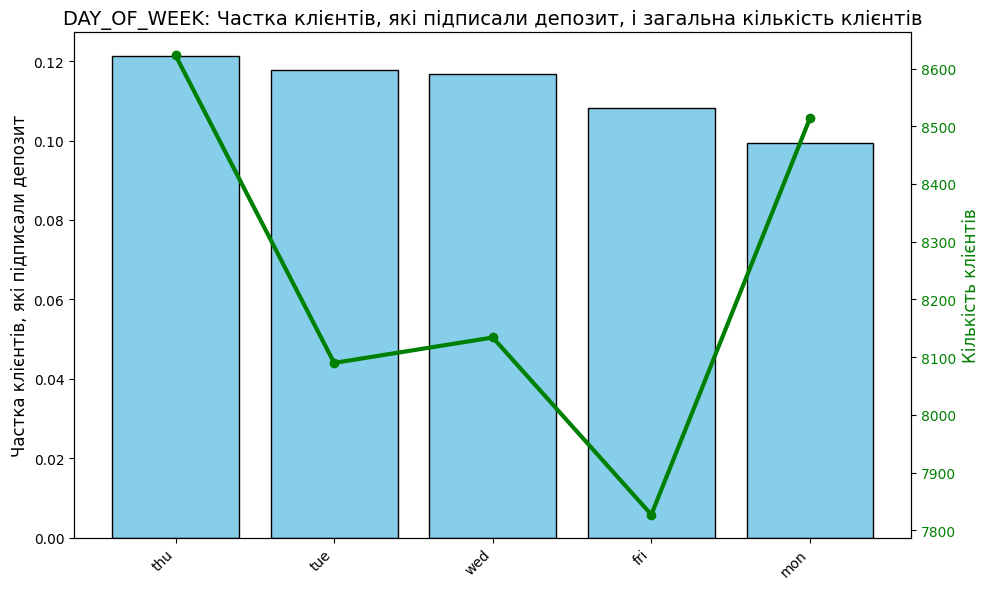

/tmp/ipython-input-3172518637.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(stats[col], rotation=45, ha='right')


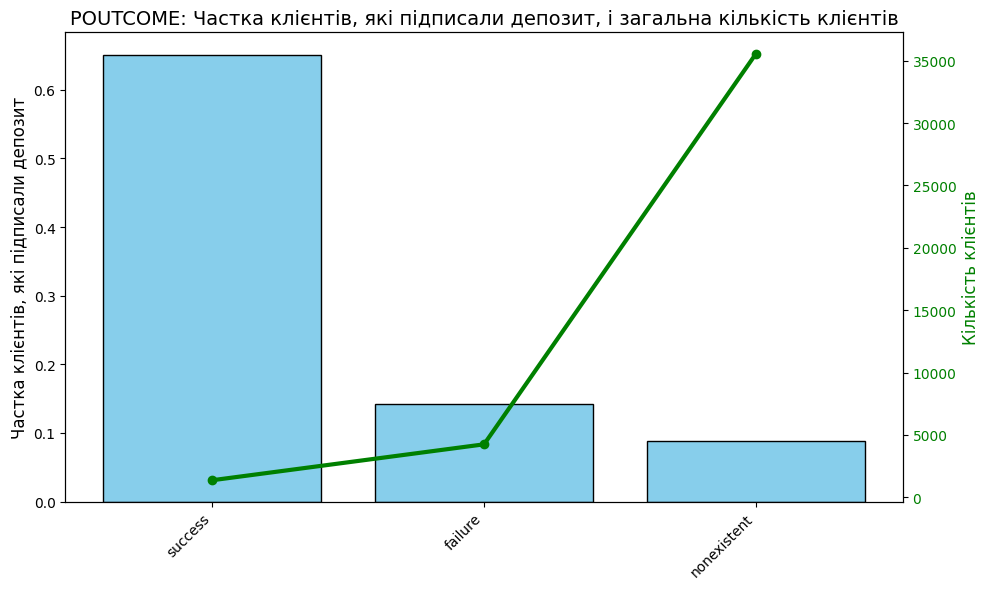

In [135]:
categorical_cols_list = [col for col in raw_df.select_dtypes(include=['object']).columns if col != 'y']
for col in categorical_cols_list:
    stats = raw_df.groupby(col)["y"].agg(
        total="count",
        yes_ratio=lambda x: (x=="yes").mean()
    ).reset_index()

    stats = stats.sort_values("yes_ratio", ascending=False)

    fig, ax1 = plt.subplots(figsize=(10,6))
    bars = ax1.bar(stats[col], stats["yes_ratio"], color="skyblue", edgecolor="black")
    ax1.set_ylabel('Частка клієнтів, які підписали депозит', fontsize=12)
    ax1.set_xticklabels(stats[col], rotation=45, ha='right')
    ax1.set_title(f'{col.upper()}: Частка клієнтів, які підписали депозит, і загальна кількість клієнтів', fontsize=14)

    ax2 = ax1.twinx()
    ax2.plot(stats[col], stats["total"], color="green", marker="o", linewidth=3)
    ax2.set_ylabel('Кількість клієнтів', fontsize=12, color="green")
    ax2.tick_params(axis='y', labelcolor="green")

    plt.tight_layout()
    plt.show()

### Результати аналізу категорійних змінних  
Змінні HOUSING, LOAN і DAY_OF_WEEK не будемо враховувати у моделі, оскільки частка клієнтів, які підписали депозит, для різних категорій суттєво не відрізняється.
Решта категорійних змінних можуть мати вплив на підписання депозиту, тому їх врахуємо в моделі



### Аналіз числових змінних

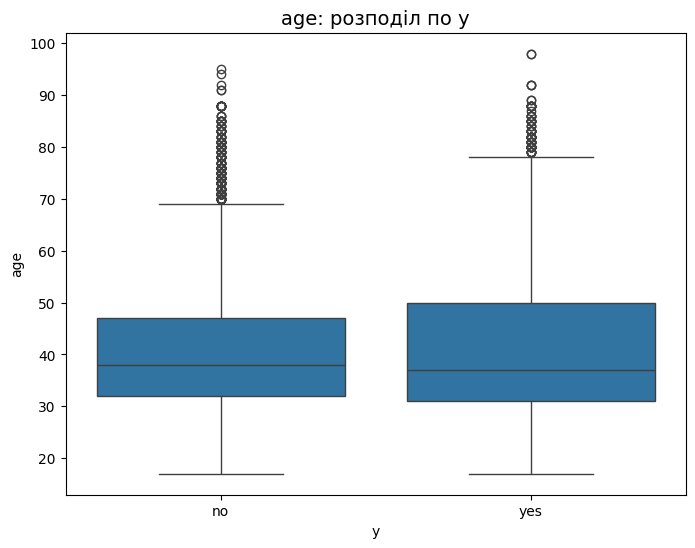

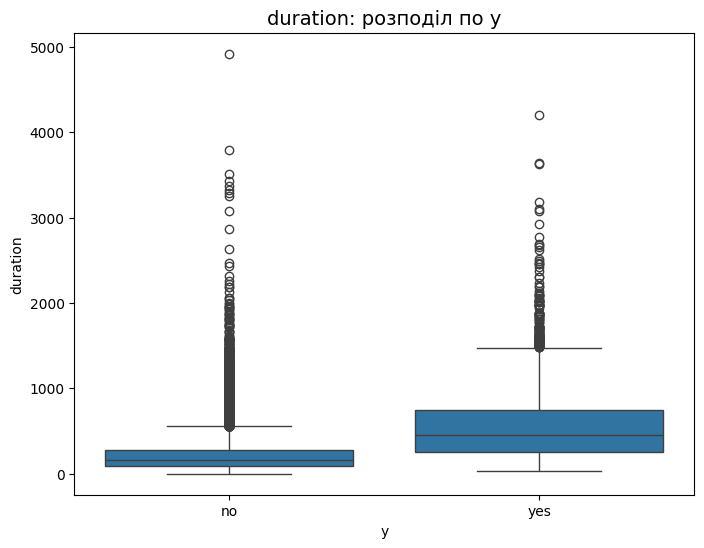

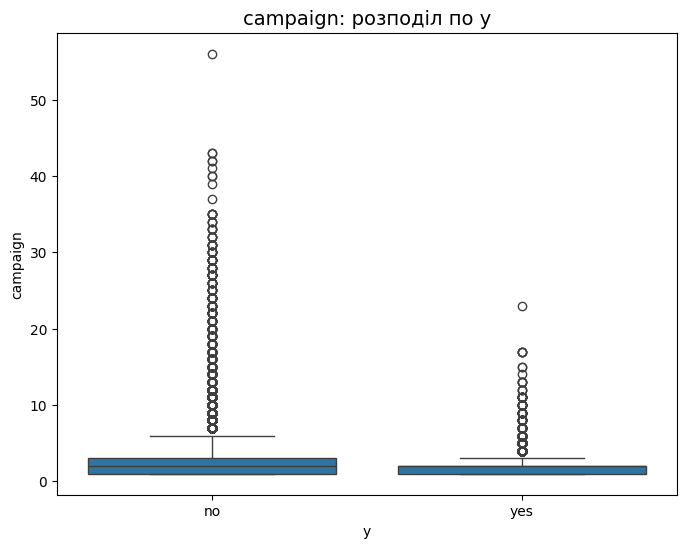

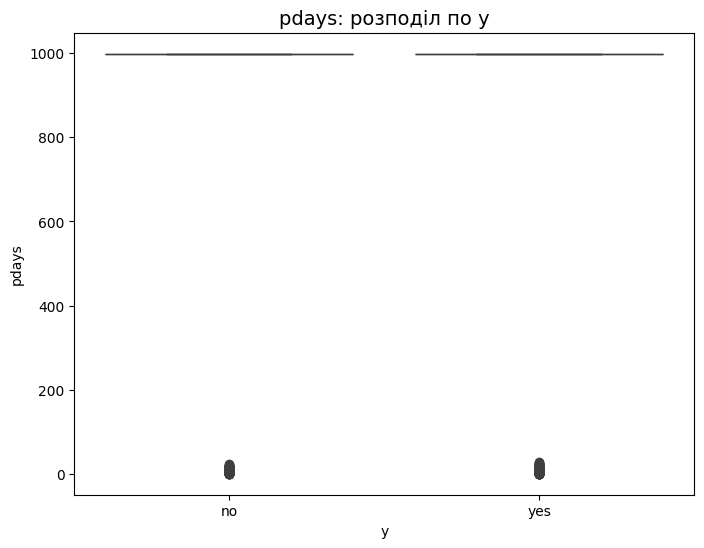

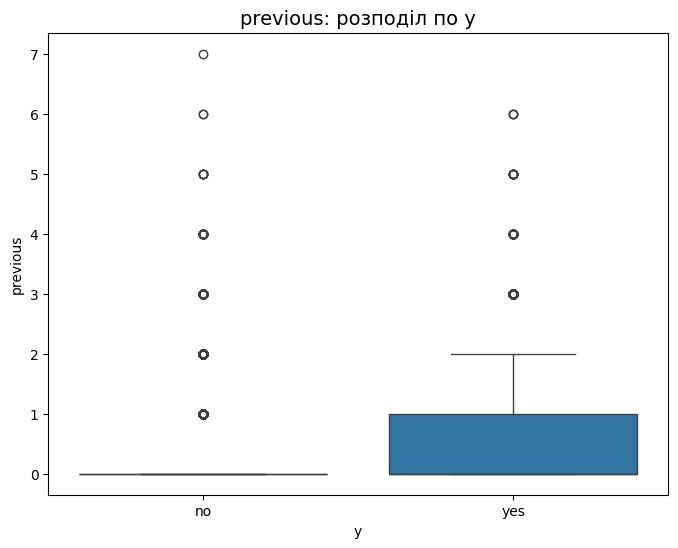

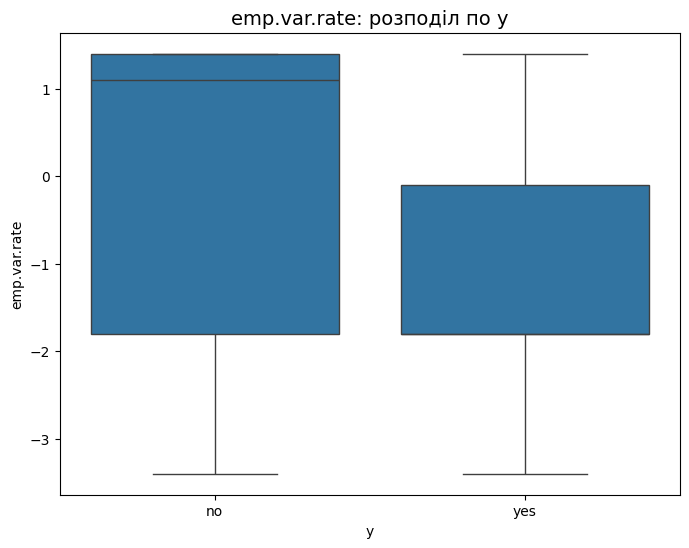

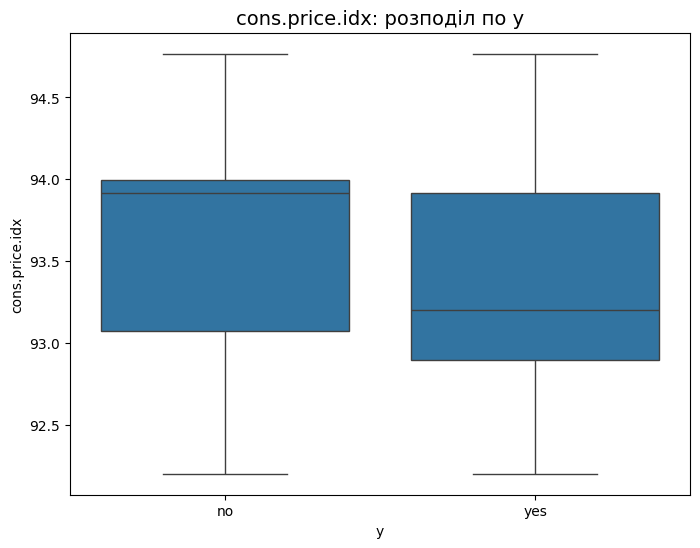

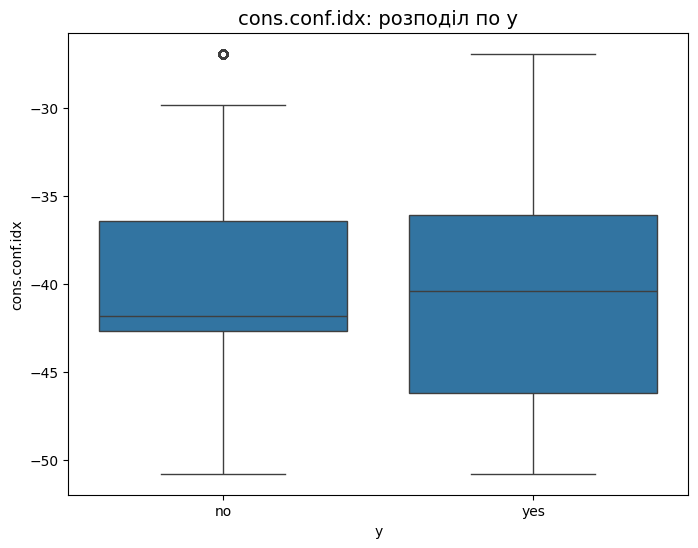

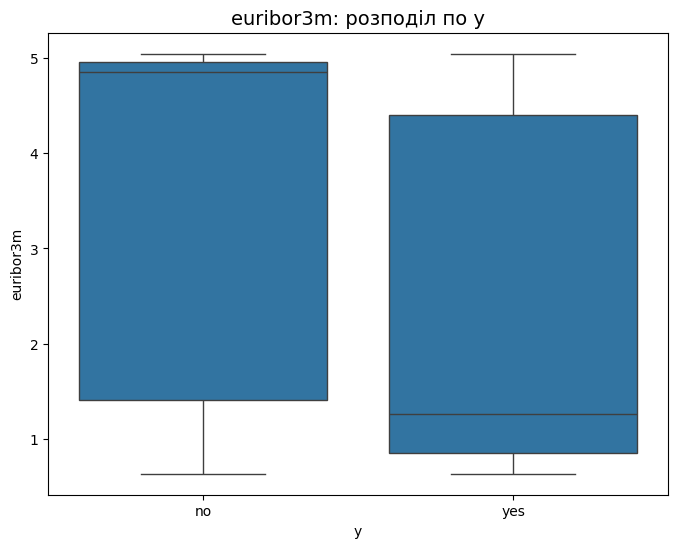

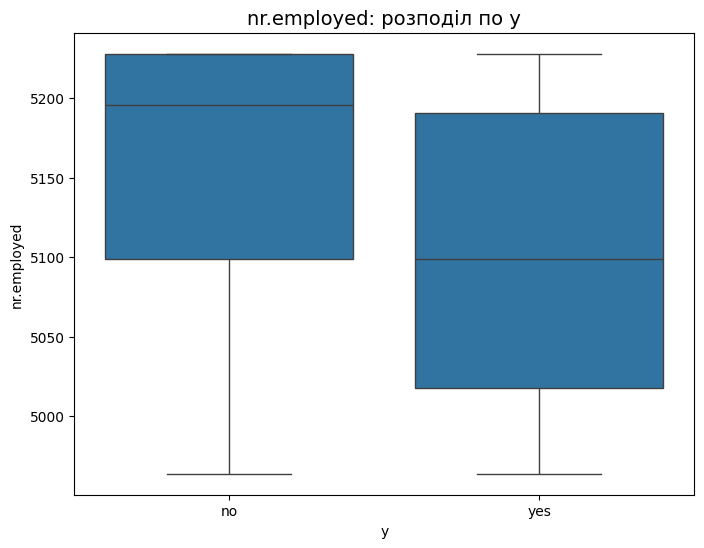

In [136]:
for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='y', y=col, data=raw_df)
    plt.title(f'{col}: розподіл по y', fontsize=14)
    plt.ylabel(col)
    plt.xlabel('y')
    plt.show()

Деякі числові змінні мають схожий розподіл даних і медіану для клієнтів, які підписали депозит, і клієнтів, які не підписали депозит. Їх не будемо враховувати у моделі:  
- age
- cons.price.idx
- cons.conf.idx
- nr.employed.  

Також не будемо включати у модель змінну duration, як описано в умові задачі.  

Для euribor3m сильно відрізняється медіана для клієнтів, що підписали і що не підписали депозит. Тому цю змінну варто включити у модель.  

Решту змінних потрібно проаналізувати додатково, оскільки із отриманих box plot не можна зробити висновки.


In [137]:
raw_df[raw_df['y'] == 'yes'][['campaign', 'pdays', 'previous', 'emp.var.rate']].describe()

,campaign,pdays,previous,emp.var.rate
count,4640.000000,4640.000000,4640.000000,4640.000000
mean,2.051724,792.035560,0.492672,-1.233448
std,1.666245,403.407181,0.860344,1.623626
min,1.000000,0.000000,0.000000,-3.400000
25%,1.000000,999.000000,0.000000,-1.800000
50%,2.000000,999.000000,0.000000,-1.800000
75%,2.000000,999.000000,1.000000,-0.100000
max,23.000000,999.000000,6.000000,1.400000


In [138]:
raw_df[raw_df['y'] == 'no'][['campaign', 'pdays', 'previous', 'emp.var.rate']].describe()

,campaign,pdays,previous,emp.var.rate
count,36548.000000,36548.000000,36548.000000,36548.000000
mean,2.633085,984.113878,0.132374,0.248875
std,2.873438,120.656868,0.409199,1.482932
min,1.000000,0.000000,0.000000,-3.400000
25%,1.000000,999.000000,0.000000,-1.800000
50%,2.000000,999.000000,0.000000,1.100000
75%,3.000000,999.000000,0.000000,1.400000
max,56.000000,999.000000,7.000000,1.400000


Змінні campaign, pdays i previous мають однакову медіану для клієнтів, які підписали депозит, і які не підписали депозит, а також схожий розмах даних. Тому їх не будемо враховувати у моделі.

Натомість emp.var.rate має досить різну медіану і середнє для клієнтів, які підписали депозит, і які не підписали депозит. Тому її варто включити у модель.

###  Аналіз викидів - числові ознаки

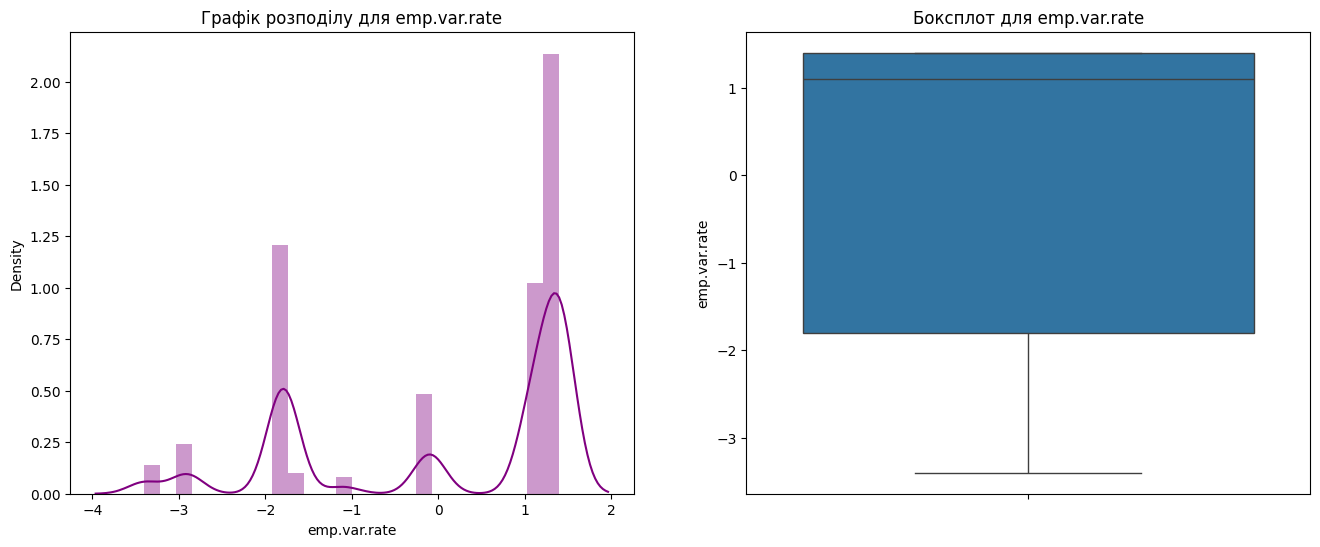

In [139]:
def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

dist_box(raw_df,'emp.var.rate')

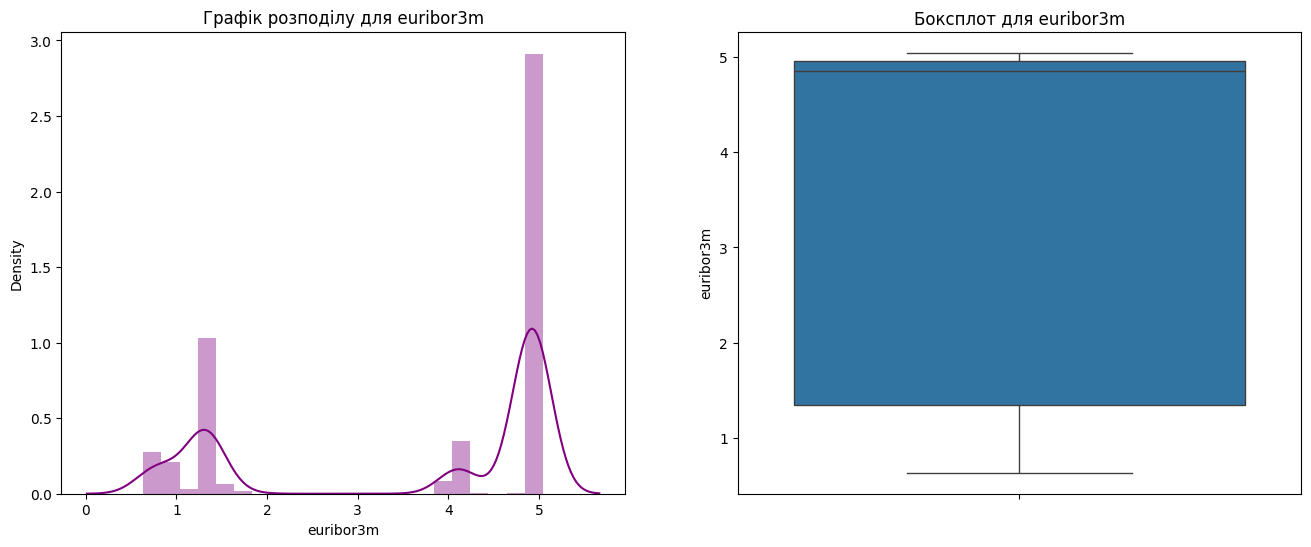

In [140]:
dist_box(raw_df,'euribor3m')

Обидві числові ознаки мають обмежений діапазон значень і, як видно з графіків, вони не мають явних викидів

### Робота з пропущеними значеннями

У датасеті немає полів зі значеннями NULL, проте деякі категорійні колонки мають значення unknown/nonexistent:  
- job
- marital
- education
- default
- poutcome

Тому потрібно визначити, чи є серед них ознаки, для яких значення unknown/nonexistent становили б більше 40% усіх значень

In [141]:
cols_to_check = ['job', 'marital', 'education', 'default', 'poutcome']
for col in cols_to_check:
    total = len(raw_df[col])
    unknowns = raw_df[col].isin(['unknown', 'nonexistent']).sum()
    ratio = unknowns / total
    print(f"{col}: {ratio:.1%} unknown/nonexistent")


job: 0.8% unknown/nonexistent
marital: 0.2% unknown/nonexistent
education: 4.2% unknown/nonexistent
default: 20.9% unknown/nonexistent
poutcome: 86.3% unknown/nonexistent


Бачимо, що ознака poutcome має 86% значень nonexistent, тому її потрібно виключити з моделювання

Сформуємо датасет за виключенням нерелевантних ознак

In [142]:
numeric_cols_relevant = []
categorical_cols_relevant = ['job', 'marital', 'education', 'default', 'contact', 'month']
data = raw_df[['emp.var.rate', 'euribor3m', 'job', 'marital', 'education', 'default', 'contact', 'month', 'y']]
data.head()

,emp.var.rate,euribor3m,job,marital,education,default,contact,month,y
0,1.1,4.857,housemaid,married,basic.4y,no,telephone,may,no
1,1.1,4.857,services,married,high.school,unknown,telephone,may,no
2,1.1,4.857,services,married,high.school,no,telephone,may,no
3,1.1,4.857,admin.,married,basic.6y,no,telephone,may,no
4,1.1,4.857,services,married,high.school,no,telephone,may,no


### One Hot Encoding



Спочатку транформуємо деякі категорійні поля у числові:
- education - це категорійна ознака, але освіта має ступені, які можна ранжувати, тому їй можна присвоїти числові значення
- month - місяцю можна присвоїти номер
- y - цільову змінну треба трансформувати з yes/no на 1/0

In [143]:
education_dict = {'unknown':0,
                  'illiterate':1,
                  'basic.4y':2,
                  'basic.6y':3,
                  'basic.9y':4,
                  'high.school':5,
                  'professional.course':6,
                  'university.degree':7}
month_dictionary = {'mar': 3,
                    'apr': 4,
                    'may': 5,
                    'jun': 6,
                    'jul': 7,
                    'aug': 8,
                    'sep': 9,
                    'oct': 10,
                    'nov': 11,
                    'dec': 12
                    }
y_dict = {'no': 0,
          'yes': 1}

data.loc[:, 'education'] = data['education'].map(education_dict)
data.loc[:, 'month'] = data['month'].map(month_dictionary)
data.loc[:, 'y'] = data['y'].map(y_dict).astype(int)

In [144]:
data['y'] = pd.Series(data['y'], dtype='int')

/tmp/ipython-input-817178550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = pd.Series(data['y'], dtype='int')


In [145]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cols_for_encoding = ['job', 'marital', 'default', 'contact']
encoder.fit(data[cols_for_encoding])
encoded_cols = list(encoder.get_feature_names_out(cols_for_encoding))
data.loc[:,encoded_cols] = encoder.transform(data[cols_for_encoding])
data.head()

,emp.var.rate,euribor3m,job,marital,education,default,contact,month,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,contact_cellular,contact_telephone
0,1.1,4.857,housemaid,married,2,no,telephone,5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.1,4.857,services,married,5,unknown,telephone,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.1,4.857,services,married,5,no,telephone,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.1,4.857,admin.,married,3,no,telephone,5,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.1,4.857,services,married,5,no,telephone,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [146]:
data.shape

(41188, 30)

In [147]:
data = data.drop(['job', 'marital', 'default', 'contact'], axis=1)
data.shape

(41188, 26)

In [148]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['y'])
X_train = train.drop(['y'], axis=1)
train_targets = train['y']
X_test = test.drop('y', axis=1)
test_targets = test['y']

In [149]:
scaler = MinMaxScaler()
cols_for_scaling = ['emp.var.rate', 'euribor3m', 'education', 'month']
scaler.fit(X_train[cols_for_scaling])

X_train[cols_for_scaling] = scaler.transform(X_train[cols_for_scaling])
X_test[cols_for_scaling] = scaler.transform(X_test[cols_for_scaling])
X_train.head()

,emp.var.rate,euribor3m,education,month,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,contact_cellular,contact_telephone
25611,0.687500,0.790297,0.571429,0.888889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26010,0.687500,0.790297,1.000000,0.888889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
40194,0.354167,0.053503,0.285714,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
297,0.937500,0.957379,1.000000,0.222222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
36344,0.104167,0.142371,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [150]:
X_train.describe()

,emp.var.rate,euribor3m,education,month,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,contact_cellular,contact_telephone
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,0.725098,0.676580,0.706018,0.401106,0.252322,0.225827,0.035205,0.025948,0.071168,0.041457,0.033354,0.096995,0.021578,0.163885,0.024219,0.008042,0.111533,0.605554,0.280941,0.001973,0.789287,0.210622,0.000091,0.634537,0.365463
std,0.327347,0.393538,0.273072,0.226515,0.434351,0.418132,0.184300,0.158984,0.257110,0.199347,0.179561,0.295956,0.145304,0.370177,0.153729,0.089320,0.314795,0.488739,0.449465,0.044372,0.407821,0.407757,0.009542,0.481567,0.481567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.160961,0.571429,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.937500,0.957379,0.714286,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.980957,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Logistic Regression

Accuracy: 88.76%


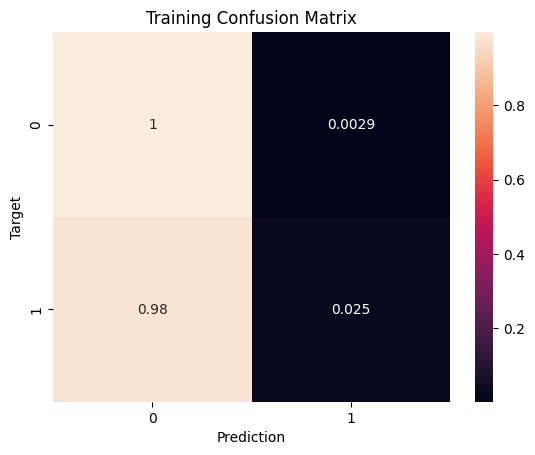

In [151]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 88.78%


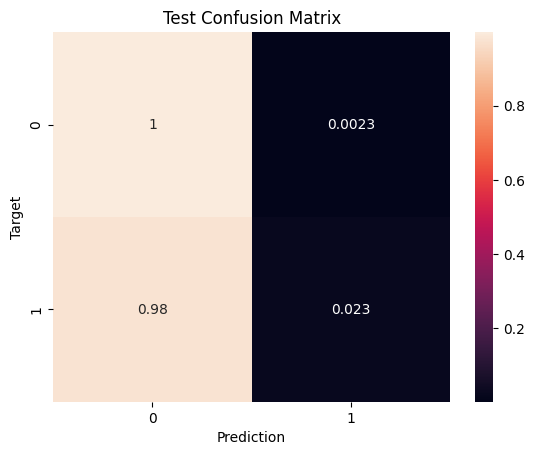

In [152]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [153]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [154]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1.0)
  print(f"F1 score {name}: {f1_score_:.2f}%")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_test, test_targets, 'Validation')

F1 score Training: 0.05%
F1 score Validation: 0.04%


AUROC for Training: 0.76


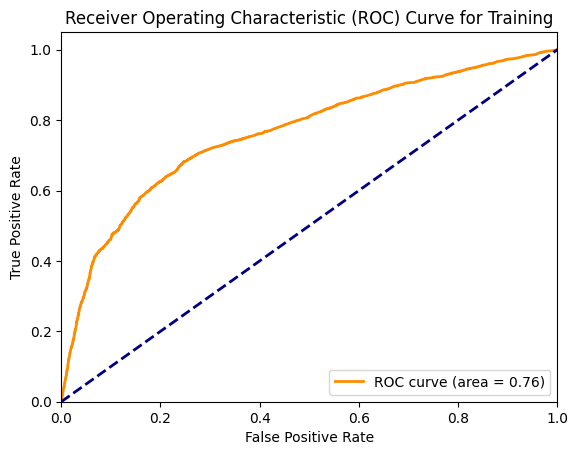

AUROC for Validation: 0.77


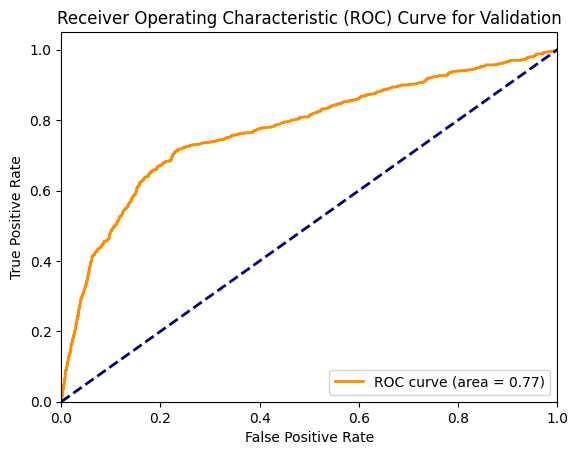

In [155]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_test, test_targets, 'Validation')

In [156]:
train['y'].value_counts()

,count
y,
0,29238
1,3712


In [157]:
def all_no(inputs):
    return np.full(len(inputs), 0.0)
accuracy_score(train_targets, all_no(X_train))

0.8873444613050075

In [158]:
accuracy_score(test_targets, all_no(X_test))

0.8873512988589464

Модель логістичної регресії має точність (accuracy_score) приблизно на рівні моделі, яка завжди прогнозує негетивний результат. Тому потрібно знайти більш якісну модель.

### Decision Tree

AUROC for Training: 0.96


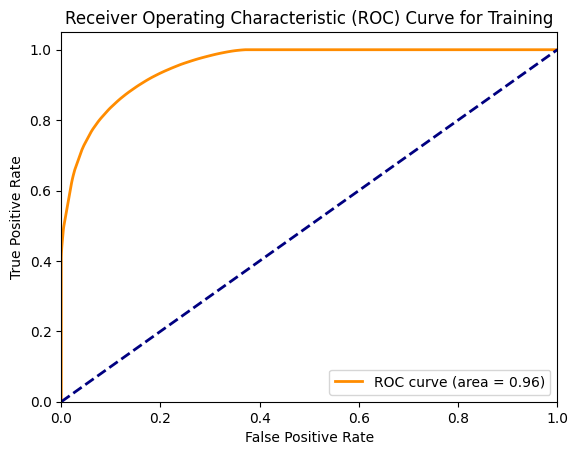

AUROC for Validation: 0.63


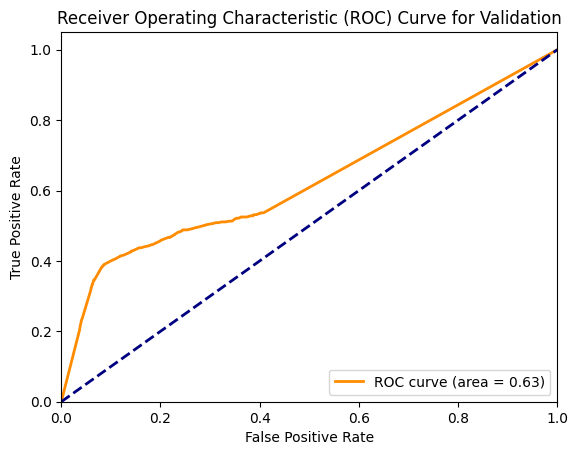

In [159]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_test, test_targets, 'Validation')

Модель має схильність до перенавчання, тому що AUROC на тренувальних даних високий, а на тестових - низький. Тому потрібно підібрати параметри, за яких модель краще генералізує

In [160]:
model.tree_.max_depth

35

In [161]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- euribor3m <= 0.10
|   |--- contact_cellular <= 0.50
|   |   |--- euribor3m <= 0.01
|   |   |   |--- truncated branch of depth 9
|   |   |--- euribor3m >  0.01
|   |   |   |--- truncated branch of depth 16
|   |--- contact_cellular >  0.50
|   |   |--- emp.var.rate <= 0.22
|   |   |   |--- truncated branch of depth 24
|   |   |--- emp.var.rate >  0.22
|   |   |   |--- truncated branch of depth 33
|--- euribor3m >  0.10
|   |--- euribor3m <= 0.57
|   |   |--- month <= 0.28
|   |   |   |--- truncated branch of depth 28
|   |   |--- month >  0.28
|   |   |   |--- truncated branch of depth 24
|   |--- euribor3m >  0.57
|   |   |--- month <= 0.39
|   |   |   |--- truncated branch of depth 24
|   |   |--- month >  0.39
|   |   |   |--- truncated branch of depth 31



In [162]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
1,euribor3m,0.508291
2,education,0.134587
3,month,0.042930
17,marital_married,0.028905
18,marital_single,0.027618
4,job_admin.,0.024343
13,job_technician,0.021385
16,marital_divorced,0.021256
9,job_retired,0.019862
20,default_no,0.018827


In [163]:
def max_depth_auroc(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(train_targets, y_train_proba, pos_label=1)
    train_auroc = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(test_targets, y_test_proba, pos_label=1)
    test_auroc = auc(fpr_test, tpr_test)

    return {'Max Depth': md, 'Train AUROC': train_auroc, 'Validation AUROC': test_auroc}

errors_df = pd.DataFrame([max_depth_auroc(md) for md in range(1, 35)])

errors_df.style.background_gradient(subset='Validation AUROC', cmap='Blues')


,Max Depth,Train AUROC,Validation AUROC
0,1,0.677494,0.680376
1,2,0.750423,0.766848
2,3,0.770360,0.783973
3,4,0.779918,0.791102
4,5,0.783444,0.793066
5,6,0.789292,0.795356
6,7,0.799445,0.795723
7,8,0.809075,0.789453
8,9,0.818098,0.785760
9,10,0.828334,0.769979


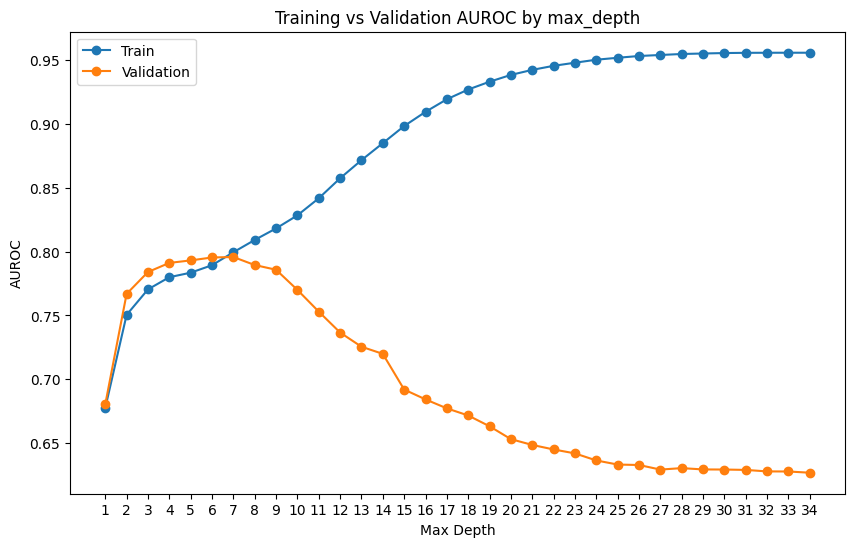

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(errors_df['Max Depth'], errors_df['Train AUROC'], marker='o')
plt.plot(errors_df['Max Depth'], errors_df['Validation AUROC'], marker='o')
plt.title('Training vs Validation AUROC by max_depth')
plt.xticks(range(1, 35))
plt.xlabel('Max Depth')
plt.ylabel('AUROC')
plt.legend(['Train', 'Validation'])
plt.show()

AUROC for Training: 0.80


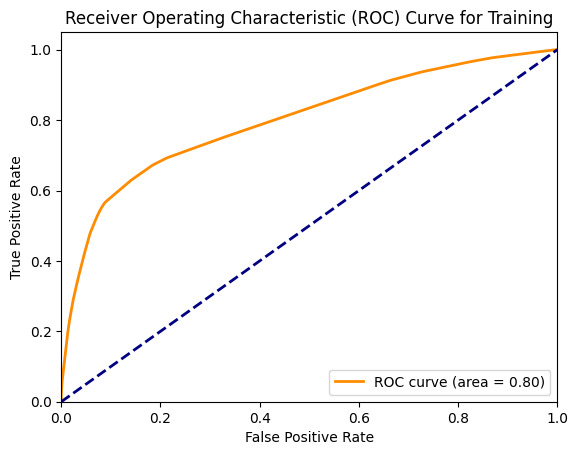

AUROC for Validation: 0.80


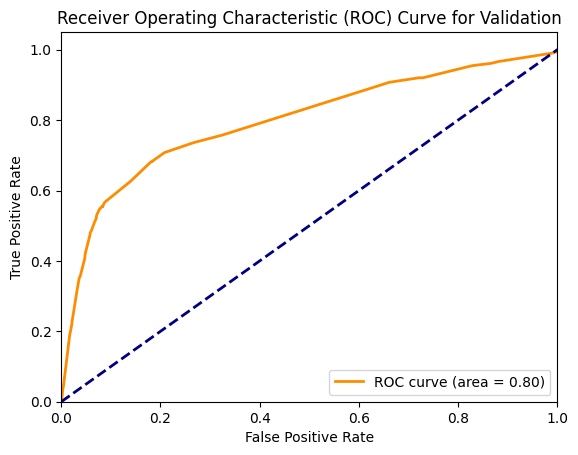

In [165]:
model = DecisionTreeClassifier(random_state=42, max_depth=7, max_leaf_nodes=100)
model.fit(X_train, train_targets)
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_test, test_targets, 'Validation')

In [166]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': 100,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Модель decision tree показує найкращий результат при max_depth=7 (розраховано вище) i max_leaf_nodes=100 (підібрано вручну). AUROC на тренувальному і тестовому датасетах складає 80%, що краще, ніж показує модель логістичної регресії

### kNN

AUROC for Training: 0.80


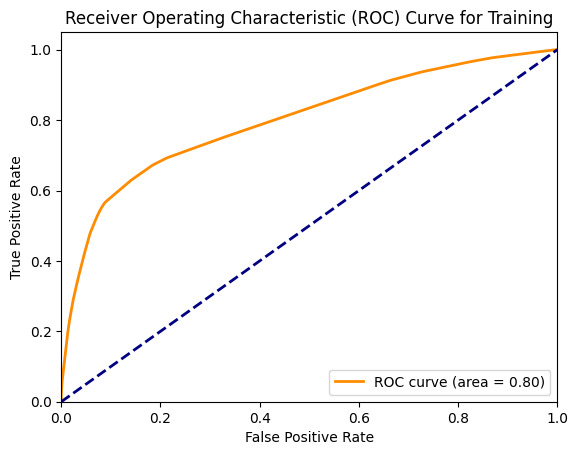

AUROC for Validation: 0.80


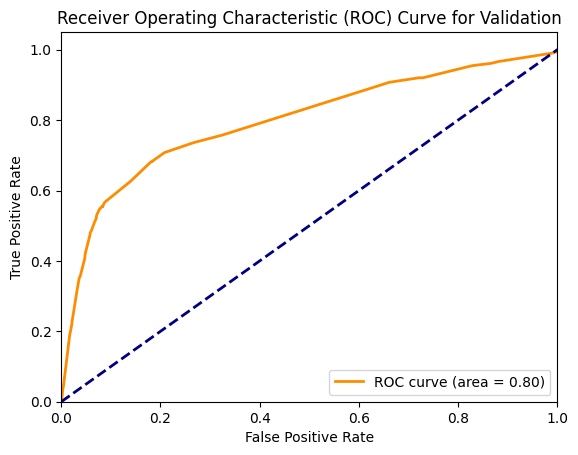

In [167]:
knn = KNeighborsClassifier()
knn.fit(X_train, train_targets)
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_test, test_targets, 'Validation')

In [168]:
params_knn = {'n_neighbors': np.arange(1, 100)}
knn_gs = GridSearchCV(knn, params_knn, cv=5, n_jobs=-1)
knn_gs.fit(X_train, train_targets)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': np.int64(45)} 0.8893474962063733


In [169]:
knn_best.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': np.int64(45),
 'p': 2,
 'weights': 'uniform'}

AUROC for Training: 0.80


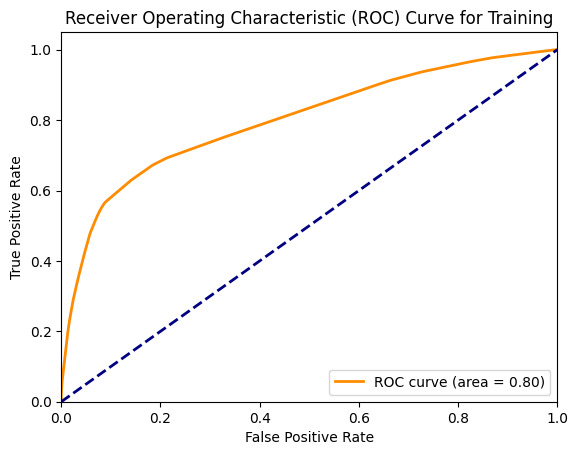

AUROC for Validation: 0.80


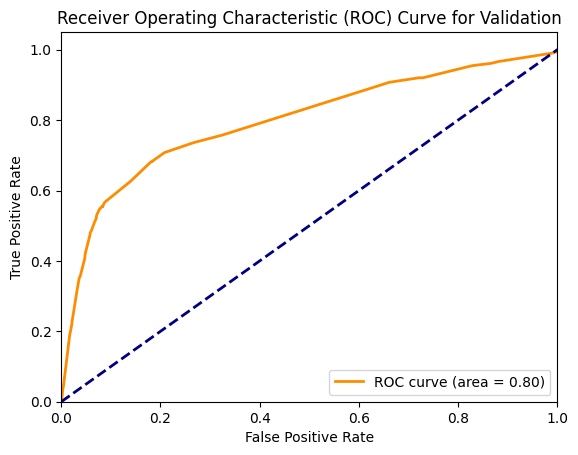

In [170]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_test, test_targets, 'Validation')

Модель kNN показує такі ж результати, як і Decision Tree: AUROC=80% для тренувального і тестового датасетів

### Boosting

#### XGBoost - RandomizedSearch

In [171]:
xgb_clf = XGBClassifier(
    max_depth=6,
    n_estimators=10,
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda'
)

param_dist = {
    'n_estimators': np.arange(10, 500, 10),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'gamma': np.linspace(0, 5, 10),
    'min_child_weight': np.arange(1, 6)
}
xgb_rs = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=30,              # тільки 30 випадкових комбінацій
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_rs.fit(X_train, train_targets)

train_pred = xgb_rs.predict(X_train)
test_pred = xgb_rs.predict(X_test)

y_pred_proba_train = xgb_rs.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(train_targets, y_pred_proba_train, pos_label=1.0)
auroc_train = auc(fpr_train, tpr_train)
print(f'AUROC_train: {auroc_train:.2f}')
y_pred_proba_test = xgb_rs.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(test_targets, y_pred_proba_test, pos_label=1.0)
auroc_test = auc(fpr_test, tpr_test)
print(f'AUROC_test: {auroc_test:.2f}')
print("Найкращі гіперпараметри:", xgb_rs.best_params_)
print("Найкращий середній результат CV (AUROC):", xgb_rs.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:30:15] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:30:15] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:30:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC_train: 0.81
AUROC_test: 0.81
Найкращі гіперпараметри: {'subsample': np.float64(0.8), 'n_estimators': np.int64(490), 'min_child_weight': np.int64(3), 'max_depth': np.int64(6), 'learning_rate': np.float64(0.01), 'gamma': np.float64(2.7777777777777777), 'colsample_bytree': np.float64(1.0)}
Найкращий середній результат CV (AUROC): 0.7913321576475334


#### XGBoost - Hyperopt

In [172]:
def objective(params):
    clf = xgb.XGBClassifier(
    n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'],  # Мінімальна сума ваг всіх вибірок, необхідна в кінцевому вузлі
        subsample=params['subsample'],  # Частка вибірок, що використовуються для побудови кожного дерева
        colsample_bytree=params['colsample_bytree'],  # Частка ознак, що використовуються при побудові кожного дерева
        gamma=params['gamma'],  # Мінімальне зменшення втрат, необхідне для виконання поділу
        reg_alpha=params['reg_alpha'],  # Параметр регуляризації L1 (Lasso)
        reg_lambda=params['reg_lambda'],  # Параметр регуляризації L2 (Ridge)
        enable_categorical=True,
        use_label_encoder=False,
        missing=np.nan,
        device='cuda',
        early_stopping_rounds=20
    )

    clf.fit(
        X_train,
        train_targets,
        eval_set=[(X_test, test_targets)],
        verbose=False)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_targets, y_pred_proba, pos_label=1.0)
    auroc = auc(fpr, tpr)
    return {'loss': -auroc, 'status': STATUS_OK}

# Простір гіперпараметрів
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 25),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.5),
    'max_depth': hp.quniform('max_depth', 3, 30, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

# Оптимізація
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

# Перетворення значень гіперпараметрів у кінцеві типи
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

# Навчання фінальної моделі з найкращими гіперпараметрами
final_clf = xgb.XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda',
)

final_clf.fit(X_train, train_targets)
train_pred_final = final_clf.predict(X_train)
test_pred_final = final_clf.predict(X_test)

y_pred_proba_train_final = final_clf.predict_proba(X_train)[:, 1]
fpr_train_final, tpr_train_final, thresholds_train_final = roc_curve(train_targets, y_pred_proba_train_final, pos_label=1.0)
auroc_train_final = auc(fpr_train, tpr_train)
print(f'AUROC_train_final: {auroc_train_final:.2f}')
y_pred_proba_test_final = final_clf.predict_proba(X_test)[:, 1]
fpr_test_final, tpr_test_final, thresholds_test_final = roc_curve(test_targets, y_pred_proba_test_final, pos_label=1.0)
auroc_test_final = auc(fpr_test_final, tpr_test_final)
print(f'AUROC_test_final: {auroc_test_final:.2f}')
print("Найкращі гіперпараметри:")
for param, value in best.items():
    print(f"  {param}: {value}")

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:41] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:41] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  5%|▌         | 1/20 [00:01<00:20,  1.05s/trial, best loss: -0.8049737752960047]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:42] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:42] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|█         | 2/20 [00:01<00:12,  1.49trial/s, best loss: -0.8049737752960047]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:42] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:42] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 15%|█▌        | 3/20 [00:01<00:09,  1.71trial/s, best loss: -0.8049737752960047]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:43] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:43] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|██        | 4/20 [00:02<00:08,  1.98trial/s, best loss: -0.8049737752960047]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:43] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:43] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|███       | 6/20 [00:03<00:06,  2.26trial/s, best loss: -0.8093935002830323]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44

 35%|███▌      | 7/20 [00:03<00:05,  2.39trial/s, best loss: -0.8093935002830323]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|████      | 8/20 [00:09<00:24,  2.06s/trial, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:50] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:50] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 45%|████▌     | 9/20 [00:09<00:17,  1.63s/trial, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:50] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:50] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 50%|█████     | 10/20 [00:17<00:34,  3.43s/trial, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 60%|██████    | 12/20 [00:17<00:14,  1.81s/trial, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:58

 65%|██████▌   | 13/20 [00:18<00:09,  1.42s/trial, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:59] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:59] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:31:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 70%|███████   | 14/20 [00:18<00:06,  1.14s/trial, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:00] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:00] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 75%|███████▌  | 15/20 [00:19<00:04,  1.09trial/s, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:00] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:00] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 80%|████████  | 16/20 [00:20<00:03,  1.01trial/s, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:01] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:01] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 85%|████████▌ | 17/20 [00:20<00:02,  1.23trial/s, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:01] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:01] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|█████████ | 18/20 [00:21<00:01,  1.51trial/s, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:02] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:02] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 95%|█████████▌| 19/20 [00:22<00:00,  1.38trial/s, best loss: -0.8095435663238832]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:03] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:03] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:32:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



100%|██████████| 20/20 [00:22<00:00,  1.12s/trial, best loss: -0.8095435663238832]
Найкращі гіперпараметри:  {'colsample_bytree': np.float64(0.8761043544268116), 'gamma': np.float64(0.3020513911629769), 'learning_rate': np.float64(0.0022514524527948894), 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 875, 'reg_alpha': np.float64(0.029896810027551513), 'reg_lambda': np.float64(0.6356335166274162), 'subsample': np.float64(0.689266149551522)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:32:03] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:32:03] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:32:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC_train_final: 0.81
AUROC_test_final: 0.81
Найкращі гіперпараметри:
  colsample_bytree: 0.8761043544268116
  gamma: 0.3020513911629769
  learning_rate: 0.0022514524527948894
  max_depth: 7
  min_child_weight: 7
  n_estimators: 875
  reg_alpha: 0.029896810027551513
  reg_lambda: 0.6356335166274162
  subsample: 0.689266149551522


 Модель XGBoost (спосіб тюнінгу гіперапараметрів - RandomizedSearch) показала найкращий результат з усіх моделей. AUROC=81% для тренувального і тестового датасетів (модель із hyperopt також зараз показала такий самий результат, але в деяких інстансах запуску показувала дещо нижчий AUROC для тестового датасету)

### Порівняльна таблиця

In [173]:
results = []
results.append(
    {
        "Model": "Logistic Regression",
        "Hyperparameters": {'C': 1.0,
                            'class_weight': None,
                            'dual': False,
                            'fit_intercept': True,
                            'intercept_scaling': 1,
                            'l1_ratio': None,
                            'max_iter': 100,
                            'multi_class': 'deprecated',
                            'n_jobs': None,
                            'penalty': 'l2',
                            'random_state': None,
                            'solver': 'liblinear',
                            'tol': 0.0001,
                            'verbose': 0,
                            'warm_start': False},
        "AUROC_train": "76%",
        "AUROC_test": "77%",
        "Comment": "Модель показує непоганий AUROC, але accuracy_score на рівні моделі, яка завжди дає негативний прогноз. Тому бажано знайти модель кращої якості. Також можна провести тюнінг гіперпараметрів та/або переглянути список ознак, включених у модель"
    }
)

results.append(
    {
        "Model": "Decision Tree",
        "Hyperparameters": {'ccp_alpha': 0.0,
                            'class_weight': None,
                            'criterion': 'gini',
                            'max_depth': 7,
                            'max_features': None,
                            'max_leaf_nodes': 100,
                            'min_impurity_decrease': 0.0,
                            'min_samples_leaf': 1,
                            'min_samples_split': 2,
                            'min_weight_fraction_leaf': 0.0,
                            'monotonic_cst': None,
                            'random_state': 42,
                            'splitter': 'best'},
        "AUROC_train": "80%",
        "AUROC_test": "80%",
        "Comment": "Модель показує кращий результат, ніж логісттична регресія. Проте модель все ж можна покращити за допомогою тюнінгу гіперпараметрів і перегляду ознак, включених у модель"
    }
)

results.append(
    {
        "Model": "kNN",
        "Hyperparameters": {'algorithm': 'auto',
                            'leaf_size': 30,
                            'metric': 'minkowski',
                            'metric_params': None,
                            'n_jobs': None,
                            'n_neighbors': np.int64(45),
                            'p': 2,
                            'weights': 'uniform'},
        "AUROC_train": "80%",
        "AUROC_test": "80%",
        "Comment": "Модель показує результат на рівні Decision Tree"
    }
)

results.append(
    {
        "Model": "XGBoost",
        "Hyperparameters": {'subsample': 0.8,
                            'n_estimators': 490,
                            'min_child_weight': 3,
                            'max_depth': 6,
                            'learning_rate': 0.01,
                            'gamma': 2.7777777777777777,
                            'colsample_bytree': 1.0},
        "AUROC_train": "81%",
        "AUROC_test": "81%",
        "Comment": "Модель показує найкращий результат з-поміж інших моделей"
    }
)

df_results = pd.DataFrame(results)

display(HTML(df_results.to_html().replace(
    '<table border="1" class="dataframe">',
    '<table border="1" class="dataframe" style="word-wrap: break-word; table-layout: fixed; width:100%;">'
)))

,Model,Hyperparameters,AUROC_train,AUROC_test,Comment
0,Logistic Regression,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}",76%,77%,"Модель показує непоганий AUROC, але accuracy_score на рівні моделі, яка завжди дає негативний прогноз. Тому бажано знайти модель кращої якості. Також можна провести тюнінг гіперпараметрів та/або переглянути список ознак, включених у модель"
1,Decision Tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}",80%,80%,"Модель показує кращий результат, ніж логісттична регресія. Проте модель все ж можна покращити за допомогою тюнінгу гіперпараметрів і перегляду ознак, включених у модель"
2,kNN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 45, 'p': 2, 'weights': 'uniform'}",80%,80%,Модель показує результат на рівні Decision Tree
3,XGBoost,"{'subsample': 0.8, 'n_estimators': 490, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 2.7777777777777777, 'colsample_bytree': 1.0}",81%,81%,Модель показує найкращий результат з-поміж інших моделей


### Важливість ознак

In [174]:
best_model = xgb_rs.best_estimator_
importances = best_model.feature_importances_

feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp)


              feature  importance
0        emp.var.rate    0.258815
1           euribor3m    0.244253
3               month    0.073604
20         default_no    0.043449
23   contact_cellular    0.037037
9         job_retired    0.033579
18     marital_single    0.025316
12        job_student    0.024316
5     job_blue-collar    0.023531
2           education    0.021363
13     job_technician    0.021104
11       job_services    0.020825
16   marital_divorced    0.019934
4          job_admin.    0.019354
8      job_management    0.019187
17    marital_married    0.019176
10  job_self-employed    0.017604
6    job_entrepreneur    0.016460
19    marital_unknown    0.016301
7       job_housemaid    0.015420
15        job_unknown    0.014814
14     job_unemployed    0.014558
21    default_unknown    0.000000
22        default_yes    0.000000
24  contact_telephone    0.000000


Найбільшу важливість мають ознаки "темп зміни зайнятості" і "ставка EURIBOR". З точки зору здорового глузду, це логічно, що ці ознаки суттєво впливають на готовність класти гроші на депозит: зайнятість/безробіття напряму впливає на дохід і здатність відкладати гроші; EURIBOR говорить про привабливість депозиту як джерела доходу

### Аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP

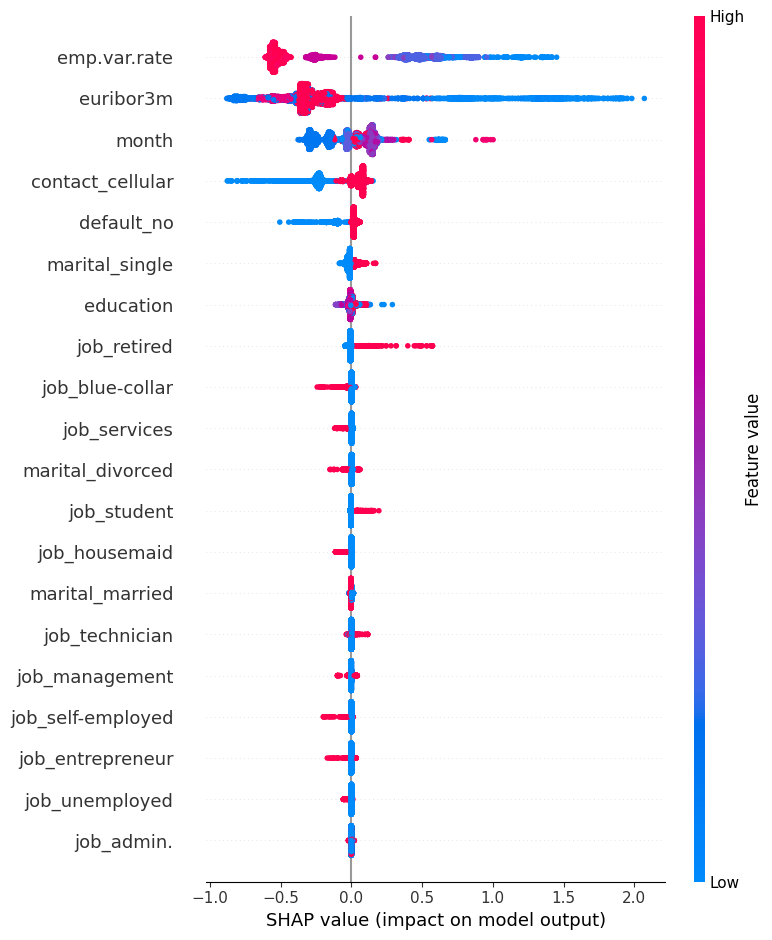

In [175]:
explainer = shap.TreeExplainer(xgb_rs.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    X_test.iloc[0,:]
)

Використання бібліотеки SHAP дало аналогічні результати, як ті, що були отримані вище

### Аналіз записів, в яких модель помиляється

In [176]:
y_pred = xgb_rs.predict(X_test)
errors_df = X_test.copy()
errors_df['true'] = test_targets.values
errors_df['pred'] = y_pred
errors_df['prob'] = final_clf.predict_proba(X_test)[:,1]
errors_df['error'] = errors_df['true'] != errors_df['pred']
mistakes = errors_df[errors_df['error'] == True]
print(mistakes.head(20))


       emp.var.rate  euribor3m  education     month  job_admin.  \
40076      0.354167   0.039900   0.857143  0.444444         0.0   
39307      0.333333   0.002040   0.000000  0.000000         1.0   
28008      0.333333   0.192473   1.000000  0.111111         1.0   
41119      0.479167   0.093403   0.428571  0.888889         0.0   
40397      0.354167   0.061211   1.000000  0.555556         0.0   
16326      1.000000   0.980957   0.714286  0.444444         0.0   
26933      0.687500   0.780322   1.000000  0.888889         1.0   
37582      0.104167   0.053276   0.428571  0.555556         0.0   
24214      0.687500   0.806393   0.857143  0.888889         0.0   
30195      0.333333   0.165722   1.000000  0.111111         0.0   
35072      0.333333   0.139651   0.571429  0.222222         0.0   
446        0.937500   0.957379   0.857143  0.222222         0.0   
38431      0.000000   0.022444   0.857143  0.777778         0.0   
13834      1.000000   0.981410   0.714286  0.444444         0.

In [177]:
ids_pred_positive = [40076, 39307, 40397, 40040, 39572]
rows_pred_positive = raw_df.loc[ids_pred_positive]
rows_pred_positive

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40076,73,retired,divorced,professional.course,unknown,yes,no,cellular,jul,thu,131,2,999,0,nonexistent,-1.7,94.215,-40.3,0.810,4991.6,no
39307,26,admin.,married,unknown,no,no,no,cellular,mar,thu,359,1,999,1,failure,-1.8,93.369,-34.8,0.643,5008.7,no
40397,27,technician,single,university.degree,no,yes,no,cellular,aug,thu,250,3,999,5,failure,-1.7,94.027,-38.3,0.904,4991.6,no
40040,30,admin.,single,university.degree,no,yes,no,cellular,jul,tue,255,2,3,1,success,-1.7,94.215,-40.3,0.797,4991.6,no
39572,30,admin.,single,university.degree,no,no,no,cellular,may,tue,113,1,6,1,success,-1.8,93.876,-40.0,0.668,5008.7,no


In [178]:
ids_pred_negative = [28008, 41119, 16326, 26933, 37582, 24214, 30195, 35072, 446, 38431, 13834]
rows_pred_negative = raw_df.loc[ids_pred_negative]
rows_pred_negative

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28008,30,admin.,married,university.degree,no,yes,yes,cellular,apr,thu,739,2,999,0,nonexistent,-1.8,93.075,-47.1,1.483,5099.1,yes
41119,36,blue-collar,single,basic.6y,no,yes,no,cellular,nov,tue,330,1,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
16326,38,technician,married,high.school,no,yes,no,cellular,jul,tue,1037,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
26933,34,admin.,divorced,university.degree,no,no,no,cellular,nov,thu,493,2,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,yes
37582,29,blue-collar,single,basic.6y,no,no,no,cellular,aug,fri,260,3,999,0,nonexistent,-2.9,92.201,-31.4,0.869,5076.2,yes
24214,48,blue-collar,divorced,professional.course,no,no,no,cellular,nov,mon,564,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,yes
30195,31,self-employed,single,university.degree,no,yes,no,cellular,apr,thu,383,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes
35072,33,blue-collar,married,basic.9y,unknown,yes,no,cellular,may,fri,730,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,yes
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
38431,56,retired,married,professional.course,no,unknown,unknown,cellular,oct,thu,181,1,6,1,success,-3.4,92.431,-26.9,0.733,5017.5,yes


Серед записів, по яких модель помиляється, не спостерігається якийсь паттерн. Але як вказано в умові задачі, і як видно із даних, де модель помилилася, є значний зв'язок цільової змінної із тривалістю останнього контакту (duration). Тому можна також спробувати створити модель, у якій duration буде цільовою змінною, і подивитися, які ознаки найбільше вливають на неї. Це може дати додаткові інсайти щодо того, як покращити модель